In [1]:
"""
Q1.1 We need to discretize our columns because we need our data to separated into bins for prediction. We don't want to predict the exact amount of these columns'
but rather an estimate of their value within a range as that will make our tree much simpler.

Q1.2 If we didn't bin our values we would need our decision tree to split into every single possible value which is entirely impractical and inefficient.

"""

"\nQ1.1 We need to discretize our columns because we need our data to separated into bins for prediction. We don't want to predict the exact amount of these columns'\nbut rather an estimate of their value within a range as that will make our tree much simpler.\n\nQ1.2 If we didn't bin our values we would need our decision tree to split into every single possible value which is entirely impractical and inefficient.\n\n"

In [2]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
#reading data into df
df = pd.read_csv('census_data.csv')
df2 = pd.read_csv('census_data.csv')
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [4]:
#2
#Here I begin my EDA in order to identify any areas I may need to address before staring analyis
df.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
df.hours_per_week_bin.describe()

count        48842
unique           5
top       b. 31-40
freq         26639
Name: hours_per_week_bin, dtype: object

In [ ]:
df.occupation_bin.describe()

count            48842
unique               5
top       c. Mid - Mid
freq             13971
Name: occupation_bin, dtype: object

In [ ]:
df.msr_bin.describe()

count       48842
unique          3
top       c. High
freq        22047
Name: msr_bin, dtype: object

In [ ]:
df.capital_gl_bin.describe()

count      48842
unique         3
top       a. = 0
freq       42525
Name: capital_gl_bin, dtype: object

In [ ]:
df.race_sex_bin.describe()

count       48842
unique          3
top       c. High
freq        29737
Name: race_sex_bin, dtype: object

In [ ]:
df.education_num_bin.describe()

count       48842
unique          5
top       b. 9-12
freq        30324
Name: education_num_bin, dtype: object

In [ ]:
df.education_bin.describe()

count      48842
unique         5
top       b. Mid
freq       30324
Name: education_bin, dtype: object

In [ ]:
df.workclass_bin.describe()

count         48842
unique            2
top       b. income
freq          46012
Name: workclass_bin, dtype: object

In [ ]:
df.age_bin.describe()

count        48842
unique           5
top       e. 40-55
freq         13963
Name: age_bin, dtype: object

In [ ]:
df.flag.describe()

count     48842
unique        2
top       train
freq      32561
Name: flag, dtype: object

In [ ]:
df.y.describe()

count    48842.000000
mean         0.239282
std          0.426649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [ ]:
df.shape

(48842, 11)

In [ ]:
df.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [ ]:
df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
df.head(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,0
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,1
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,1
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1


Data looks good overall but I need to encode in order to run a decision tree as these values won't run smoothly.

In [6]:

#saving a copy of the dataframe so I can access it for the header names later. Also, I like to keep a backup df just in case. 
labels_df = df2
labels_df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [7]:
#checking the values of a column before the transformation
labels_df['age_bin'].unique()
labels_df['education_bin'].unique()

array(['c. Bachelors', 'b. Mid', 'a. Low', 'd. Masters', 'e. High'],
      dtype=object)

In [8]:
label_encoder = preprocessing.LabelEncoder() 

def encode_df(col):
  df[col]= label_encoder.fit_transform(df[col]) 

In [9]:
# Encode labels in columns
encode_df('hours_per_week_bin')
encode_df('occupation_bin')
encode_df('msr_bin')
encode_df('capital_gl_bin')
encode_df('race_sex_bin')
encode_df('education_num_bin')
encode_df('education_bin')
encode_df('workclass_bin')
encode_df('hours_per_week_bin')
encode_df('age_bin')

df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,1,1,1,2,2,2,2,1,3,train,0
1,0,4,2,0,2,2,2,1,4,train,0
2,1,0,1,0,2,1,1,1,3,train,0
3,1,0,2,0,1,0,0,1,4,train,0
4,1,4,2,0,0,2,2,1,1,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,1,4,1,0,1,2,2,1,3,test,0
48838,1,1,0,0,1,1,1,0,2,test,0
48839,3,4,2,0,2,2,2,1,3,test,0
48840,1,1,0,2,2,2,2,1,4,test,0


In [10]:
df['age_bin'].unique()
#confirming values are encoded

array([3, 4, 1, 2, 0])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state=99, max_features = None, min_samples_leaf = 1000, min_samples_split = 1000)

In [12]:
import numpy as np

In [13]:
#splitting data
test_df = df[df.flag == 'test']
train_df = df[df.flag == 'train']

In [14]:
#selecting specific columns for analysis
y_train = train_df.y
y_test = test_df.y

x_train = train_df.drop(['flag', 'y'], axis = 'columns')
x_test = test_df.drop(['flag', 'y'], axis = 'columns')

In [15]:
#fitting model
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

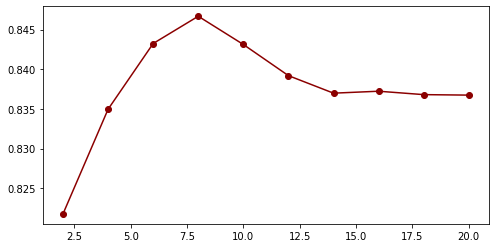

In [16]:
results = []
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth=trees, random_state=101)
  model.fit(x_train, y_train)
  y_pred_dt = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred_dt)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred', marker='o')

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

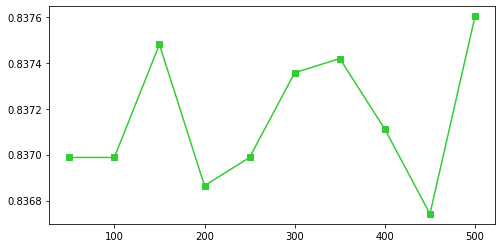

In [18]:
results_forest = []
estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for x in estimators:
  model = RandomForestClassifier(n_estimators=x, random_state=99)
  model.fit(x_train, y_train)
  y_pred_rf = model.predict(x_test)
  accuracy = model.score(x_test, y_test)
  results_forest.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results_forest, estimators).plot(color='limegreen', marker='s')

The accuracy scores seems to vary erratically. Although it does reach highest levels of accruay at 500 estimators so that seems to be the optimal value in the given range. 

In [21]:
from sklearn.ensemble import AdaBoostClassifier

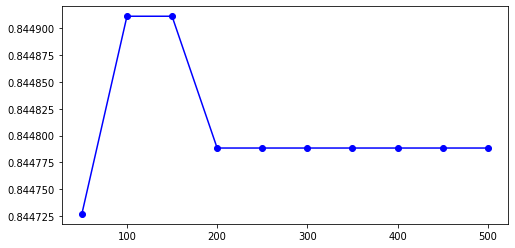

In [ ]:

results_ada = []
estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for x in estimators:
  model = AdaBoostClassifier(n_estimators=x, random_state=99)
  model.fit(x_train, y_train)
  accuracy = model.score(x_test, y_test)
  results_ada.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results_ada, estimators).plot(color='blue', marker='o')

In this case the accuracy scores sees no change after n = 200. Our optimal value would be n = 150. 

In [22]:
from sklearn.ensemble import GradientBoostingClassifier


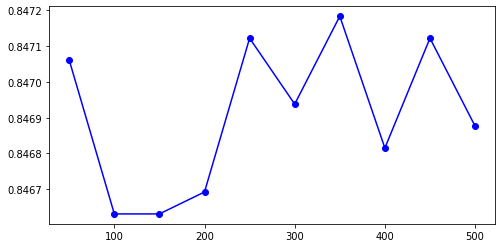

In [ ]:
results_gradient = []
estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for x in estimators:
  model = GradientBoostingClassifier(n_estimators=x, random_state=99)
  model.fit(x_train, y_train)
  accuracy = model.score(x_test, y_test)
  results_gradient.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results_gradient, estimators).plot(color='blue', marker='o')

For the gradient boost classifier our optimal value is 350. Our values vary a lot here as well.

In [23]:
from xgboost import XGBClassifier
xgb = XGBClassifier

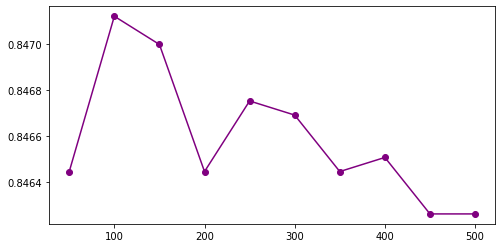

In [ ]:

results_xgb = []
estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for x in estimators:
  model = xgb(n_estimators=x, random_state=99)
  model.fit(x_train, y_train)
  accuracy = model.score(x_test, y_test)
  results_xgb.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results_xgb, estimators).plot(color='purple', marker='o')

In [24]:
accuracy_labels = ['Random Forest', 'Adaboost', 'Gradient Boost', 'XGB']

results = []
estimators = [150]

for x in estimators:
  model = RandomForestClassifier(n_estimators=x, random_state=99) 
  model.fit(x_train, y_train)
  accuracy = model.score(x_test, y_test)
  results.append(accuracy)

  model = AdaBoostClassifier(n_estimators=x, random_state=99)
  model.fit(x_train, y_train)
  accuracy = model.score(x_test, y_test)
  results.append(accuracy)

  model = GradientBoostingClassifier(n_estimators=x, random_state=99)
  model.fit(x_train, y_train)
  accuracy = model.score(x_test, y_test)
  results.append(accuracy)

  model = xgb(n_estimators=x, random_state=99)
  model.fit(x_train, y_train)
  accuracy = model.score(x_test, y_test)
  results.append(accuracy)

results

[0.8374792703150912,
 0.8449112462379461,
 0.8466310423192679,
 0.8469995700509797]

In [38]:
from sklearn import metrics
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf, pos_label=2)
metrics.auc(fpr, tpr)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


nan

In [53]:
n_list = [150]
for x in n_list: 
  rf = RandomForestClassifier(n_estimators=x, random_state=99)
  rf.fit(x_train, y_train)
  y_predrf = rf.predict(x_test)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predrf)
  rfAUC = auc(fpr, tpr)

  GBoost = GradientBoostingClassifier(n_estimators=trees, random_state = 99)
  GBoost.fit(x_train, y_train)
  y_predg = GBoost.predict(x_test)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predg)
  GBoostAUC = auc(fpr, tpr)

  ADA = AdaBoostClassifier(n_estimators=x, random_state=99)
  ADA.fit(x_train, y_train)
  y_preda = ADA.predict(x_test)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preda)
  ADAAUC = auc(fpr, tpr)

  XGBm = xgb(n_estimators=x, random_state=99)
  XGBm.fit(x_train, y_train)
  y_predx = XGBm.predict(x_test)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predx)
  XAUC = auc(fpr, tpr)

  AUC_list = [rfAUC, GBoostAUC, ADAAUC, XAUC]

In [48]:
AUC_list

[0.745802353203899, 0.7176909006396444, 0.7463574393397931, 0.7582306935220714]

In [54]:
accuracy_data = list(zip(results, AUC_list))
accuracy_data

[(0.8374792703150912, 0.745802353203899),
 (0.8449112462379461, 0.7176909006396444),
 (0.8466310423192679, 0.7463574393397931),
 (0.8469995700509797, 0.7582306935220714)]

In [57]:
final_dict = {accuracy_labels[i]: accuracy_data[i] for i in range(len(accuracy_labels))}
final_dict

{'Adaboost': (0.8449112462379461, 0.7176909006396444),
 'Gradient Boost': (0.8466310423192679, 0.7463574393397931),
 'Random Forest': (0.8374792703150912, 0.745802353203899),
 'XGB': (0.8469995700509797, 0.7582306935220714)}

In [58]:
pd.DataFrame(final_dict)

,Random Forest,Adaboost,Gradient Boost,XGB
0,0.837479,0.844911,0.846631,0.847000
1,0.745802,0.717691,0.746357,0.758231


In [69]:
print("Common Hyper-Parameters:")
print("The number of estimators for all of the ensemble methods was ",x)
print("The random state for all of the ensemble methods was 99")

Common Hyper-Parameters:
The number of estimators for all of the ensemble methods was  150
The random state for all of the ensemble methods was 99
